In [1]:
# Code taken from https://realpython.com/k-means-clustering-python/#how-to-perform-k-means-clustering-in-python
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import \
    silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd

df = pd.read_csv('digit-recognizer/train.csv')
df.head()

/var/folders/ly/j3yl18s11db7l081f49kntrr0000gn/T/ipykernel_8292/3555422090.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
features = df.loc[:, df.columns != 'label']
true_labels = df['label']

In [3]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [4]:
kmeans = KMeans(
    init = "k-means++",
    n_clusters = 10,
    n_init = 50,
    max_iter = 500,
    random_state = 42
)
kmeans.fit(scaled_features)

/Users/kprazuch/Documents/GitHub/MSCI546/.venv/lib/python3.9/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(


KMeans(max_iter=500, n_clusters=10, n_init=50, random_state=42)

In [5]:
predicted_labels = kmeans.labels_

print(f"Inertia: {kmeans.inertia_}")
print(f"Cluster Centres: {kmeans.cluster_centers_}")
print(f"# Iterations: {kmeans.n_iter_}")
# A silhouette coefficient of 0 indicates that clusters are significantly overlapping one another, 
# and a silhouette coefficient of 1 indicates clusters are well-separated.
print(f"Silhouette Score: {silhouette_score(scaled_features, predicted_labels)}")
# An ARI score of 0 indicates that cluster labels are randomly assigned, 
# and an ARI score of 1 means that the true labels and predicted labels form identical clusters.
print(f"Adjusted Rand Score: {adjusted_rand_score(true_labels, predicted_labels)}")

Inertia: 25069294.39628688
Cluster Centres: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
# Iterations: 335
Silhouette Score: 0.006911758773252749
Adjusted Rand Score: 0.319324259246994


In [6]:
# Code taken from https://medium.com/@joel_34096/k-means-clustering-for-image-classification-a648f28bdc47
def retrieve_info(cluster_labels,y_train):
    """Associates most probable label with each cluster in KMeans model 
    returns: dictionary of clusters assigned to each label"""
    # Initializing
    reference_labels = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [7]:
reference_labels = retrieve_info(predicted_labels, true_labels)
number_labels = np.random.rand(len(predicted_labels))
for i in range(len(predicted_labels)):
    number_labels[i] = reference_labels[predicted_labels[i]]
print(reference_labels)

{0: 5, 1: 3, 2: 2, 3: 2, 4: 7, 5: 7, 6: 0, 7: 4, 8: 1, 9: 6}


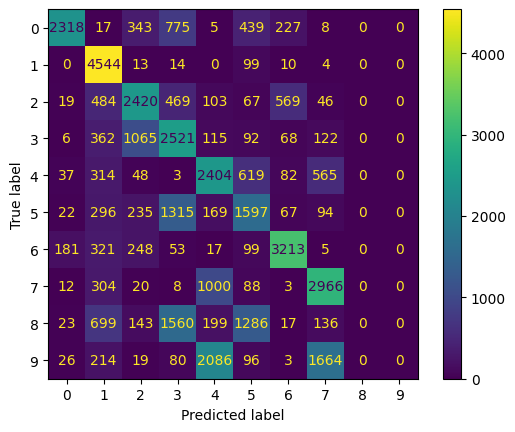

In [8]:
confusion_matrix = metrics.confusion_matrix(true_labels, number_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [23]:
print(f"First 20 true labels: \t\t {true_labels[:20].tolist()}")
print(f"First 20 predicted labels: \t {number_labels[:20].astype('int').tolist()}")

First 20 true labels: 		 [1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5]
First 20 predicted labels: 	 [1, 0, 1, 4, 0, 3, 7, 3, 3, 3, 5, 7, 1, 2, 3, 1, 2, 2, 7, 2]


In [14]:
# macro average does not take label imbalance into account
# micro and weighted averages return same value as accuracy score
print(f"Accuracy: {round(accuracy_score(true_labels, number_labels), 4) * 100}%")
print(f"Precision: {round(precision_score(true_labels, number_labels, average = 'macro'), 4) * 100}%")
print(f"Recall: {round(recall_score(true_labels, number_labels, average = 'macro'), 4) * 100}%")
print(f"F1 Score: {round(f1_score(true_labels, number_labels, average = 'macro'), 4) * 100}%")

Accuracy: 52.339999999999996%
Precision: 44.14%
Recall: 51.519999999999996%
F1 Score: 46.5%


/Users/kprazuch/Documents/GitHub/MSCI546/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
